In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import talib

In [2]:
df = pd.read_csv('../../data/yinance/META.csv')
df.head()
df.describe()

,Close,High,Low,Open,Volume
count,2923.000000,2923.000000,2923.000000,2923.000000,2.923000e+03
mean,156.727440,158.690484,154.685098,156.653626,3.060615e+07
std,90.368766,91.470736,89.222981,90.308834,2.637157e+07
min,17.621368,18.158061,17.442471,17.969224,5.467500e+06
25%,80.275124,80.970839,79.663892,80.275126,1.633730e+07
50%,152.579376,154.636700,150.730785,152.698669,2.295390e+07
75%,203.550171,206.372783,200.548679,202.963782,3.522740e+07
max,379.838379,381.975166,376.488998,379.341431,5.735764e+08


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2923 non-null   object 
 1   Close   2923 non-null   float64
 2   High    2923 non-null   float64
 3   Low     2923 non-null   float64
 4   Open    2923 non-null   float64
 5   Volume  2923 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 137.1+ KB


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

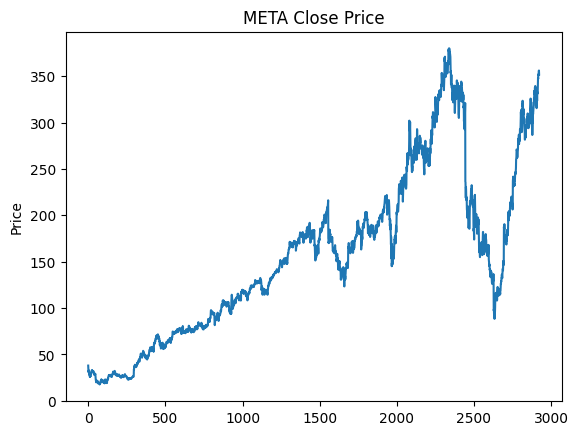

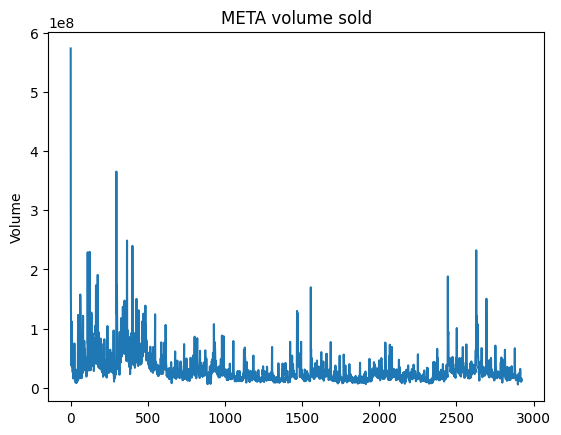

In [4]:
df['Close'].plot(title="META Close Price")
plt.ylabel("Price")
plt.show()

df['Volume'].plot(title="META volume sold")
plt.ylabel("Volume")
plt.show()

In [5]:
price= df["Close"]
df["SMA_20"] = talib.SMA(price, timeperiod=20)
df["SMA_50"] = talib.SMA(price, timeperiod=50)
df["EMA_20"] = talib.EMA(price, timeperiod=20)

df["RSI_14"] = talib.RSI(price, timeperiod=14)

df["MACD"], df["MACD_signal"], df["MACD_hist"] = talib.MACD(
    price, 
    fastperiod=12, 
    slowperiod=26, 
    signalperiod=9
)

df.tail()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
2918,2023-12-22,351.224823,355.011477,349.068105,353.401377,11772800,332.302945,323.317843,335.581703,67.333885,6.945367,4.729907,2.215461
2919,2023-12-26,352.655975,354.792827,351.284456,352.814999,9898600,333.303278,324.115724,337.207824,68.187000,7.436800,5.271285,2.165514
2920,2023-12-27,355.637543,356.800387,353.132994,353.888347,13207900,334.239505,324.844828,338.963036,69.947874,7.974921,5.812012,2.162908
2921,2023-12-28,356.124634,359.682686,355.617749,357.496184,11798800,335.537503,325.527023,340.597473,70.237702,8.344500,6.318510,2.025990
2922,2023-12-29,351.791290,357.794292,349.664418,356.790470,14987100,336.869788,326.262290,341.663551,64.296803,8.193282,6.693464,1.499818


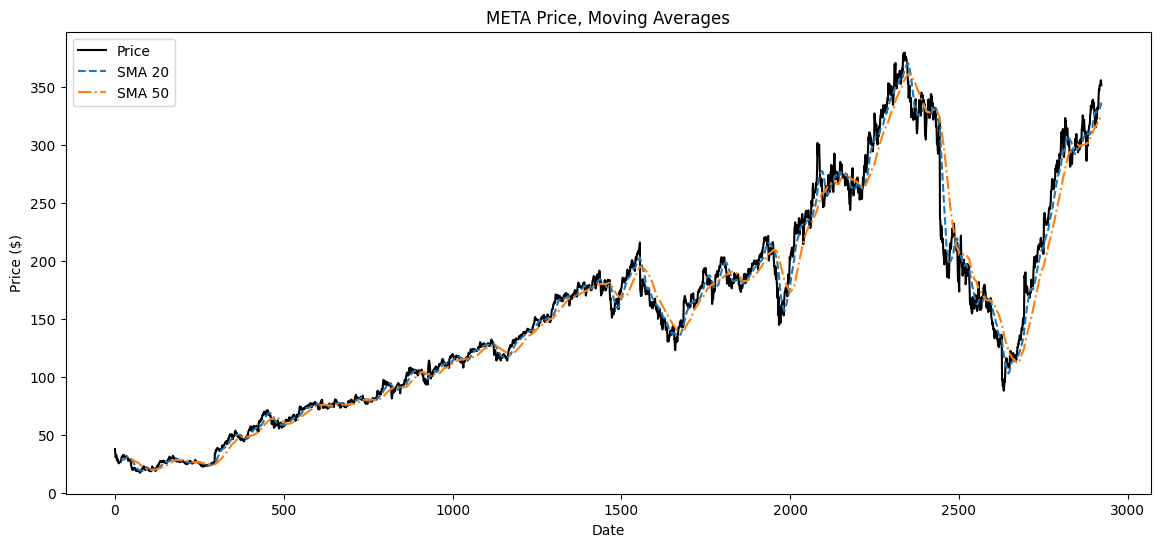

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df.index, price, label="Price", color="black")
ax.plot(df.index, df["SMA_20"], label="SMA 20", linestyle="--")
ax.plot(df.index, df["SMA_50"], label="SMA 50", linestyle="-.")
ax.set_title("META Price, Moving Averages")
ax.set_xlabel("Date")
ax.set_ylabel("Price ($)")
ax.legend()
plt.show()

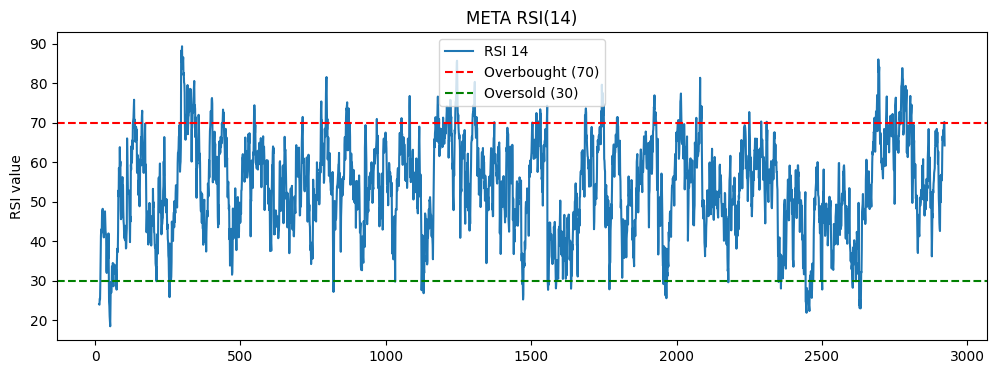

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df.index, df["RSI_14"], label="RSI 14")
ax.axhline(70, color="red", linestyle="--", label="Overbought (70)")
ax.axhline(30, color="green", linestyle="--", label="Oversold (30)")
ax.set_title("META RSI(14)")
ax.set_ylabel("RSI value")
ax.legend()
plt.show()

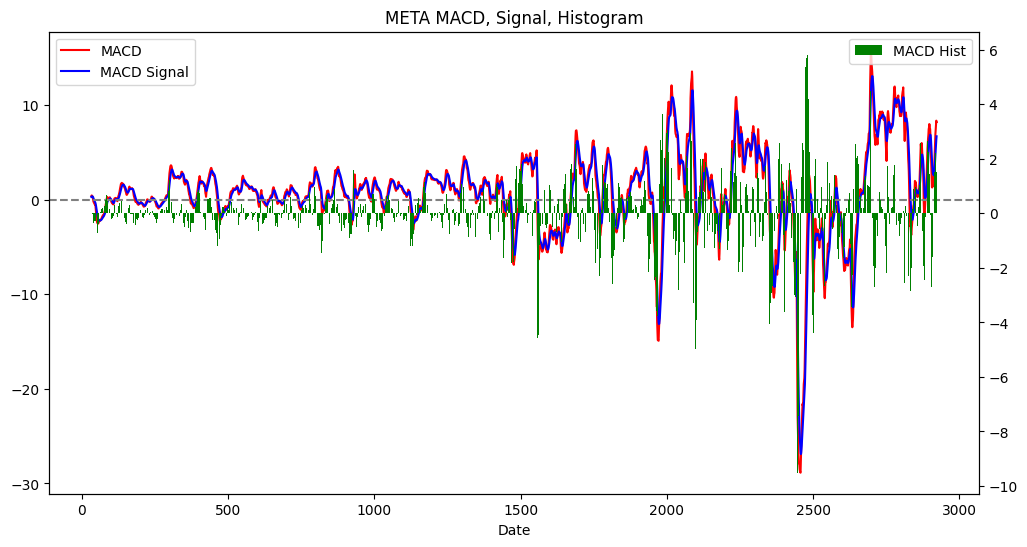

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.index, df["MACD"], label="MACD", color="red")
ax.plot(df.index, df["MACD_signal"], label="MACD Signal", color="blue")
ax.axhline(0, color="grey", linestyle="--")
ax2 = ax.twinx()
ax2.bar(df.index, df["MACD_hist"], label="MACD Hist", color="green")

ax.set_title("META MACD, Signal, Histogram")
ax.set_xlabel("Date")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()